## Part 2.2: Introduction to Data Visualization in Python

## Line Graphs and Time Series

Importing the matplotlib library's submodule pyplot and referring to it as plt:

In [1]:
import matplotlib.pyplot as plt

Demonstrating a simple line graph:

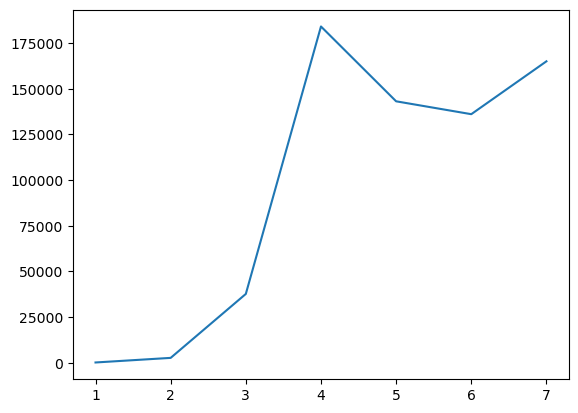

In [2]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_deaths = [213, 2729, 37718, 184064, 143119, 136073, 165003]

import matplotlib.pyplot as plt

plot = plt.plot(month_number, new_deaths)
plt.show(plot)

## OR plt.show(plt.plot(month_number, new_deaths))

Customising graphs:

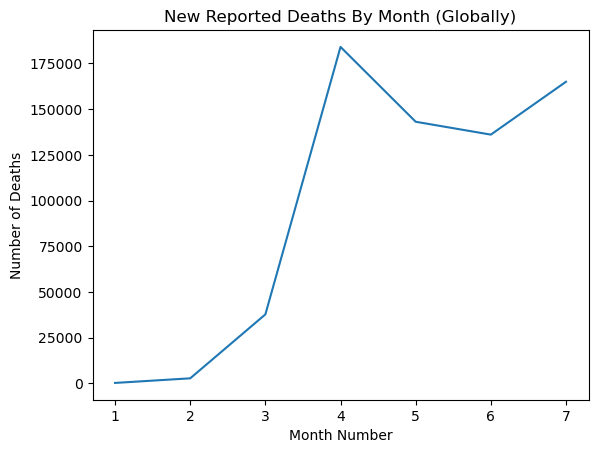

In [3]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_deaths = [213, 2729, 37718, 184064, 143119, 136073, 165003]

plt.plot(month_number, new_deaths)
plt.title("New Reported Deaths By Month (Globally)")
plt.xlabel("Month Number")
plt.ylabel("Number of Deaths")
plt.show()

Importing pandas and processing data to use:

In [4]:
import pandas as pd

who_time_series = pd.read_csv("WHO_time_series.csv")

who_time_series["Date_reported"] = pd.to_datetime(who_time_series["Date_reported"])

print(who_time_series.head(5))
print(who_time_series.tail(5))
print(who_time_series.info())

  Date_reported Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-04   China          1                 1           0   
1    2020-01-05   China          0                 1           0   
2    2020-01-06   China          3                 4           0   
3    2020-01-07   China          0                 4           0   
4    2020-01-08   China          0                 4           0   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
      Date_reported                           Country  New_cases  \
31871    2020-07-31                            Panama       1046   
31872    2020-07-31                       Timor-Leste          0   
31873    2020-07-31                         Guatemala       1221   
31874    2020-07-31  Saint Vincent and the Grenadines          0   
31875    2020-07-31  Democratic Republic of the Congo         79   

       Cumulative_cases  New_deaths  Cumulat

Defining a method to create a line graph from a set of data:

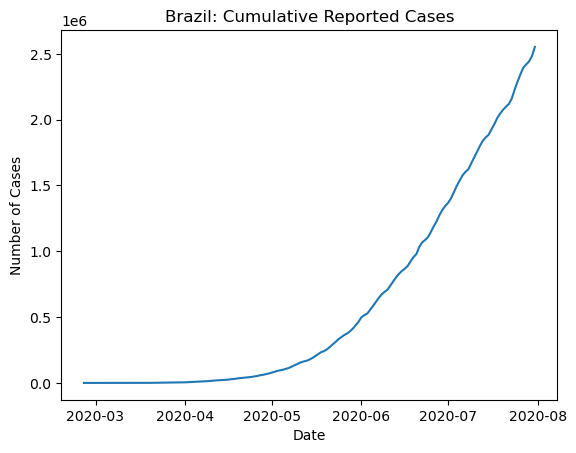

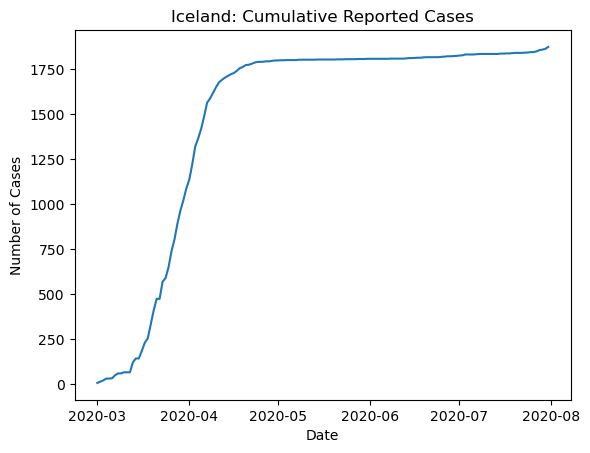

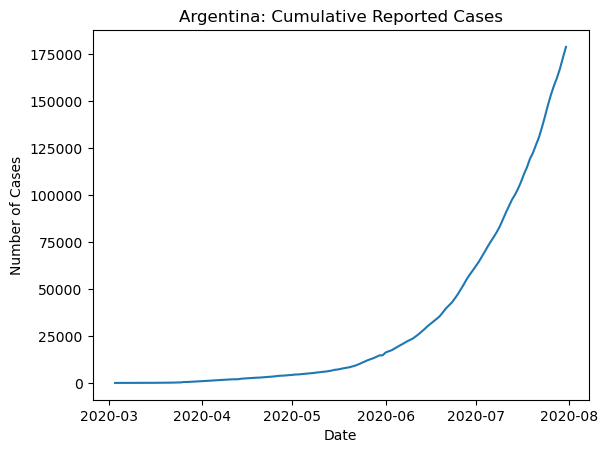

In [5]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()
    
brazil = plot_cumulative_cases("Brazil")
iceland = plot_cumulative_cases("Iceland")
argentina = plot_cumulative_cases("Argentina")

Graphing multiple sets of data for comparison using a legend:

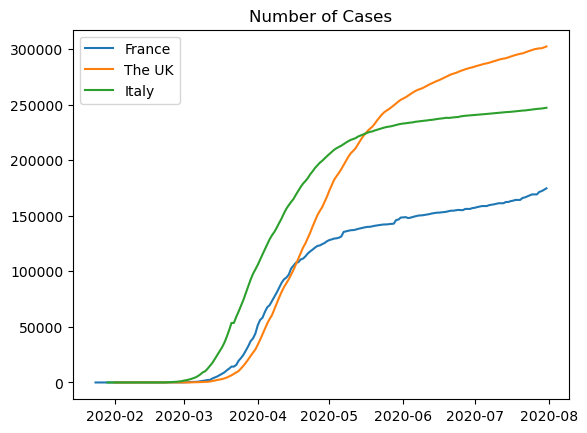

In [6]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france["Date_reported"], france["Cumulative_cases"], label="France")
plt.plot(uk["Date_reported"], uk["Cumulative_cases"], label="The UK")
plt.plot(italy["Date_reported"], italy["Cumulative_cases"], label="Italy")
plt.title("Number of Cases")
plt.legend()
plt.show()

## Scatter Plots and Correlations

The dataset used for this section was collected by researcher [Hadi Fanaee-T](https://www.researchgate.net/profile/Hadi-Fanaee-T), and is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).

Reading the csv and inspecting the head, tail and info:

In [7]:
import pandas as pd
bike_sharing = pd.read_csv("day.csv")

print(bike_sharing.head(5))

print(bike_sharing.tail(5))

bike_sharing.info()

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     instant      dteday  

Plotting a combined line graph, with adjustments to text rotation:
The date column needed to first be converted to datetime format to appear properly.

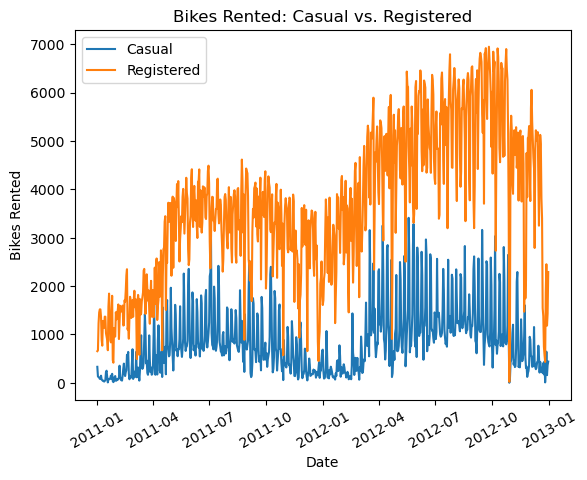

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing['dteday'],bike_sharing['casual'],label="Casual")
plt.plot(bike_sharing['dteday'],bike_sharing['registered'],label="Registered")
plt.xticks(rotation=30)
plt.ylabel("Bikes Rented")
plt.xlabel("Date")
plt.title("Bikes Rented: Casual vs. Registered")
plt.legend()
plt.show()

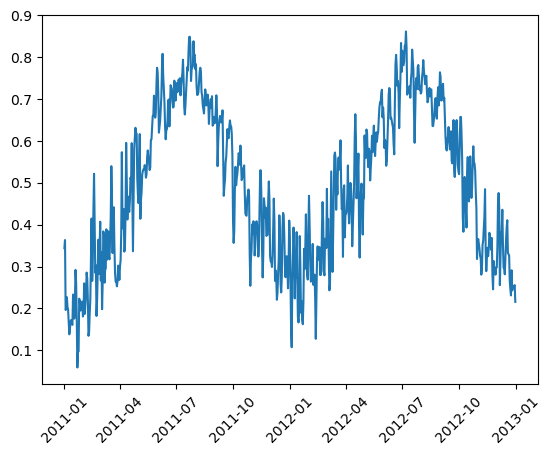

In [9]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing["dteday"],bike_sharing["temp"])
plt.xticks(rotation=45)
plt.show()

Creating a scatter plot:

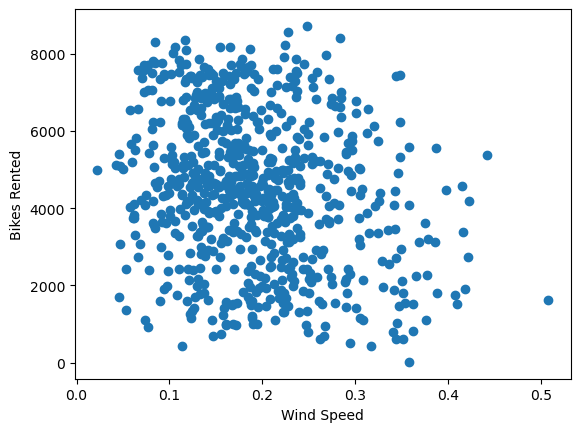

In [10]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.scatter(bike_sharing["windspeed"],bike_sharing["cnt"])
plt.xlabel("Wind Speed")
plt.ylabel("Bikes Rented")
plt.show()

Calculating Pearson's r between columns and visualising:

0.9917015532294641


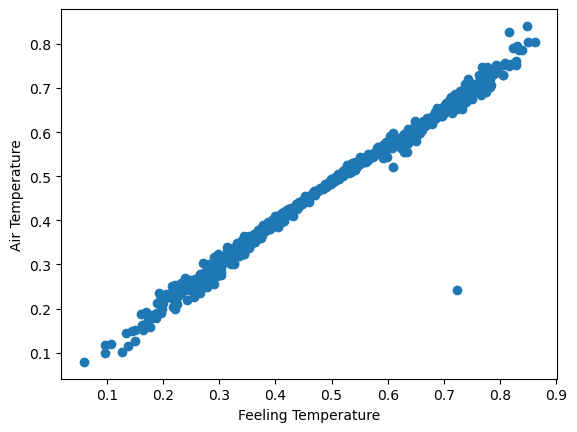

In [11]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])

plt.scatter(bike_sharing["temp"],bike_sharing["atemp"])
plt.ylabel("Air Temperature")
plt.xlabel("Feeling Temperature")

print(temp_atemp_corr)

-0.2484890986437141


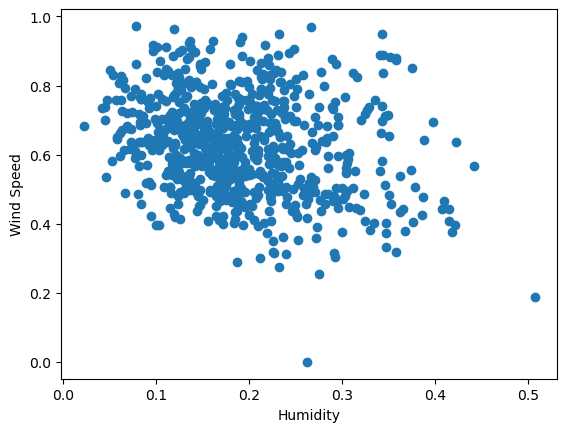

In [12]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

plt.scatter(bike_sharing["windspeed"],bike_sharing["hum"])
plt.ylabel("Wind Speed")
plt.xlabel("Humidity")

print(wind_hum_corr)

## Bar Plots, Histograms, and Distributions

Creating scatter plots purely to show that they are the incorrect choice to visualise categorical data:

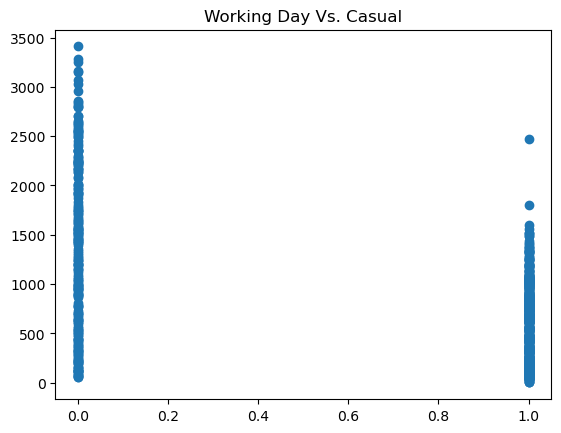

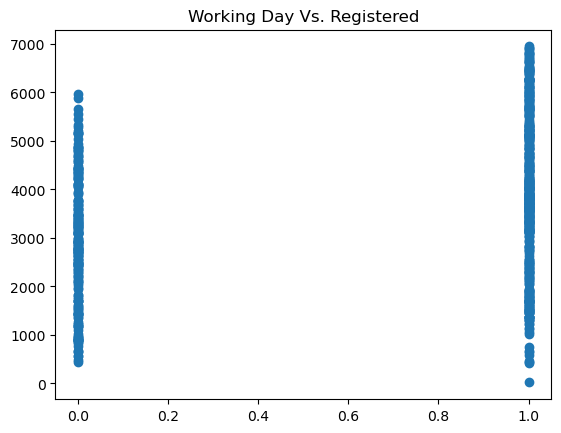

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.scatter(bike_sharing["workingday"],bike_sharing["casual"])
plt.title("Working Day Vs. Casual")
plt.show()

plt.scatter(bike_sharing["workingday"],bike_sharing["registered"])
plt.title("Working Day Vs. Registered")
plt.show()

Basic bar graph:

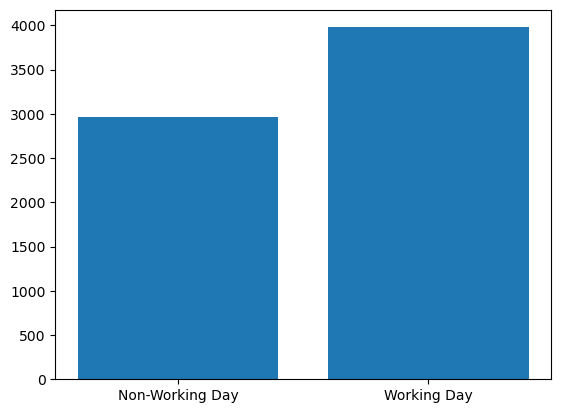

In [14]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days,registered_avg)
plt.show()

Customising bar plots:

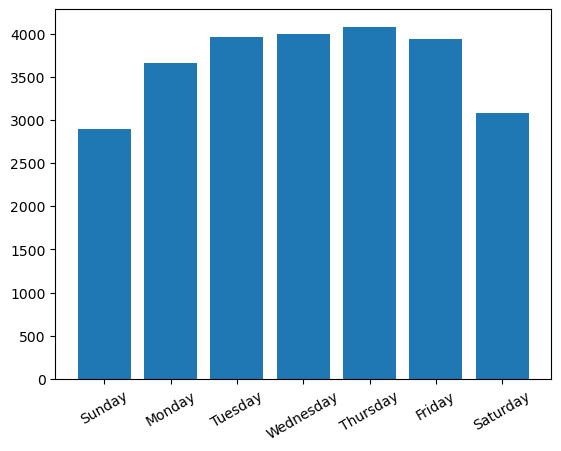

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


In [15]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index() # It's not essential to understand how this code works, we'll cover this in a later course

plt.bar(weekday_averages["weekday"],weekday_averages["registered"])
plt.xticks(
    ticks=[0,1,2,3,4,5,6],
    labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],rotation=30
)
plt.show()

weekday_averages

Creating grouped frequency tables:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

registered_freq = bike_sharing["registered"].value_counts(bins=10).sort_index()
print(registered_freq)

casual_freq = bike_sharing["casual"].value_counts(bins=10).sort_index()
print(casual_freq)

registered
(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: count, dtype: int64
casual
(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: count, dtype: int64


Creating histograms:

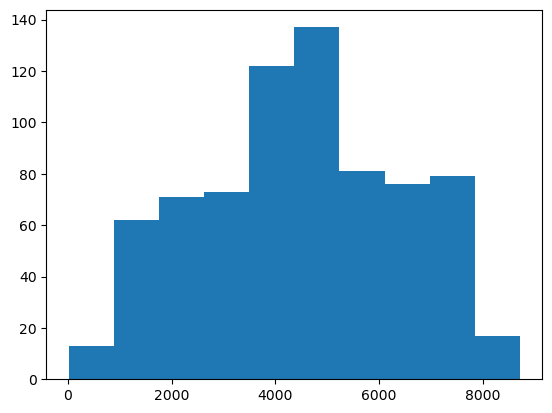

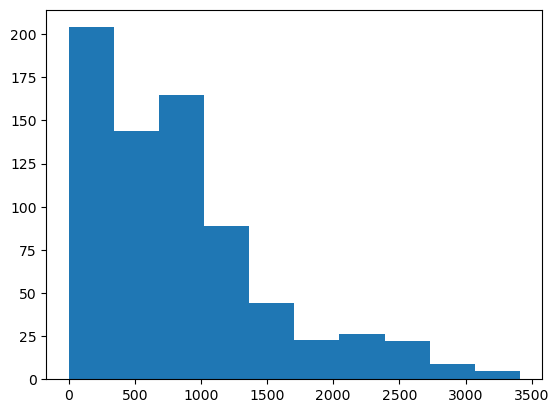

In [17]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.hist(bike_sharing["cnt"])
plt.show()

plt.hist(bike_sharing["casual"])
plt.show()

## Pandas Visualizations and Grid Charts

The dataset used for this section was collected by researchers [Ricardo Pinto Ferreira](https://www.researchgate.net/profile/Ricardo_Pinto_Ferreira), [Andréa Martiniano](https://www.researchgate.net/profile/Andrea_Martiniano), and [Renato Jose Sassi](https://www.researchgate.net/profile/Renato_Sassi), and is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/483/behavior+of+the+urban+traffic+of+the+city+of+sao+paulo+in+brazil).

Looking at the structure of the data:

In [18]:
import pandas as pd
traffic = pd.read_csv("traffic_sao_paulo.csv",sep=";")
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

Using Series.plot as an alternative method for visualisations:

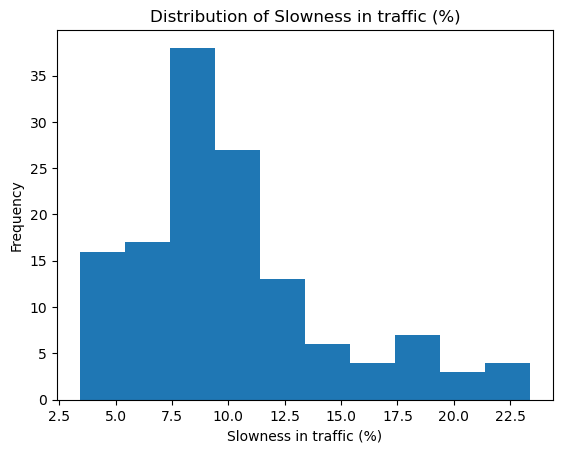

In [19]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

traffic["Slowness in traffic (%)"].plot.hist()
plt.xlabel("Slowness in traffic (%)")
plt.title("Distribution of Slowness in traffic (%)")
plt.show()

Creating horizontal bar plots:

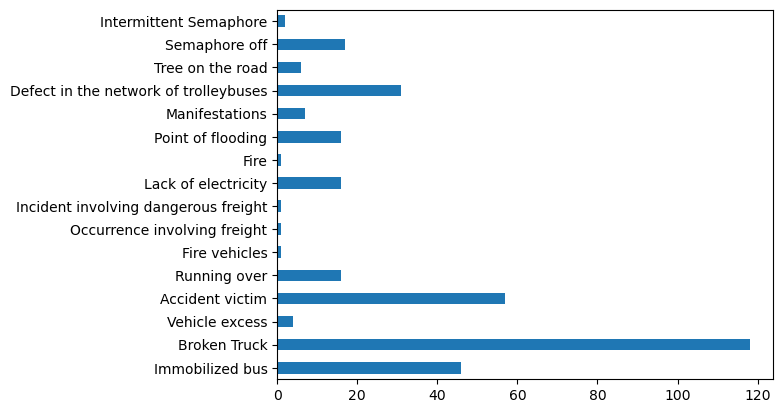

In [20]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)

incidents.sum().plot.barh()
plt.show()

Generating scatter plots:

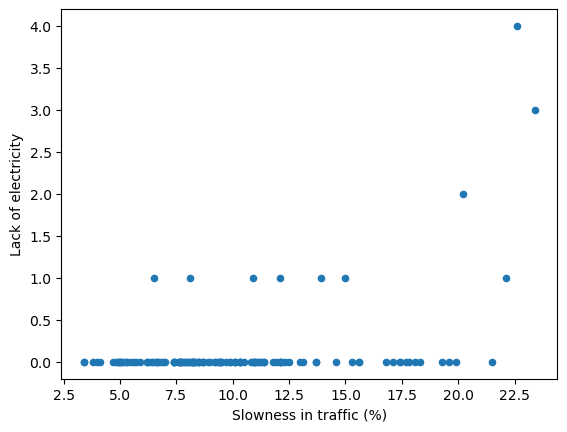

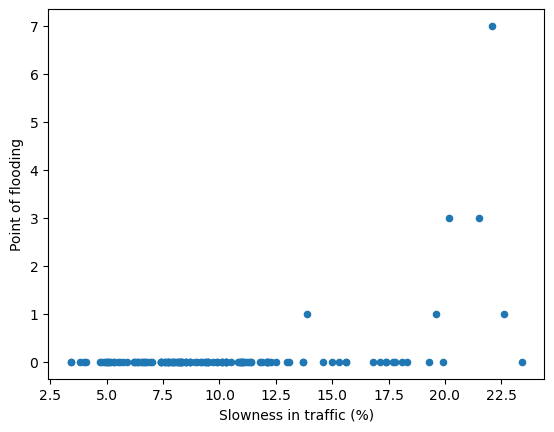

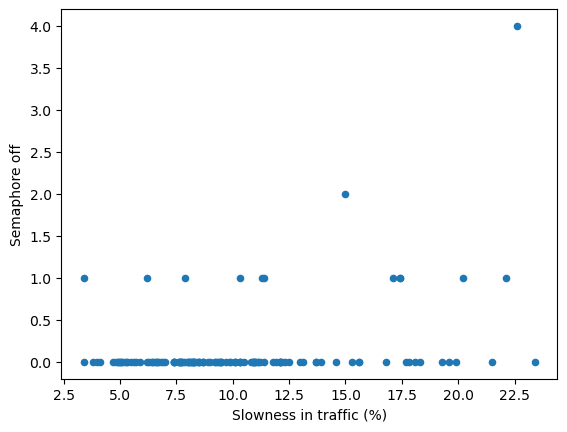

In [21]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()

traffic.plot.scatter(x="Slowness in traffic (%)",y="Point of flooding")
plt.show()

traffic.plot.scatter(x="Slowness in traffic (%)",y="Semaphore off")
plt.show()

Filtering then graphing:

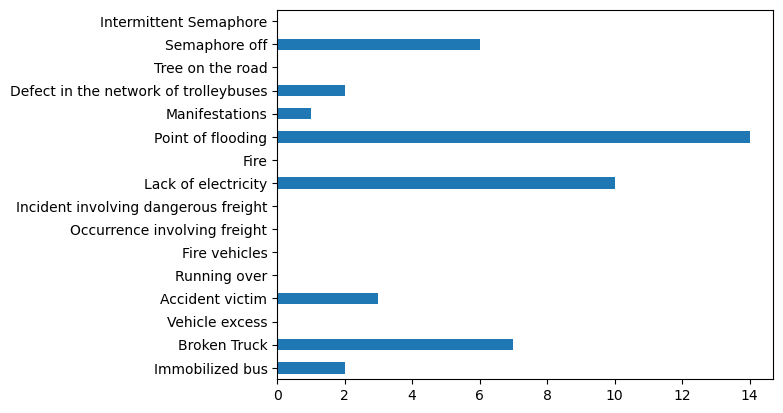

In [22]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

slowness_20_or_more = traffic[traffic["Slowness in traffic (%)"] >= 20]
slowness_20_or_more = slowness_20_or_more.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)

incident_frequencies = slowness_20_or_more.sum()

incident_frequencies.plot.barh()
plt.show()

Creating line graphs from daily data:

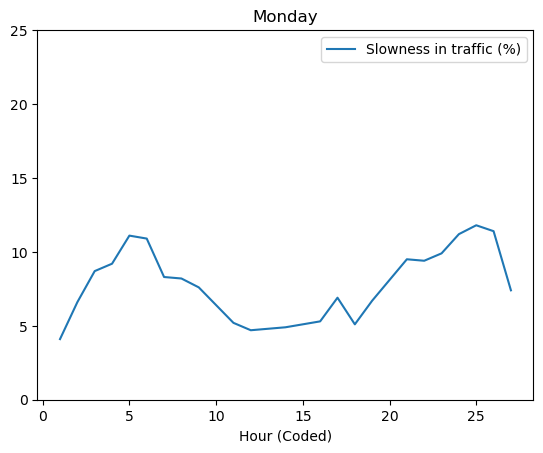

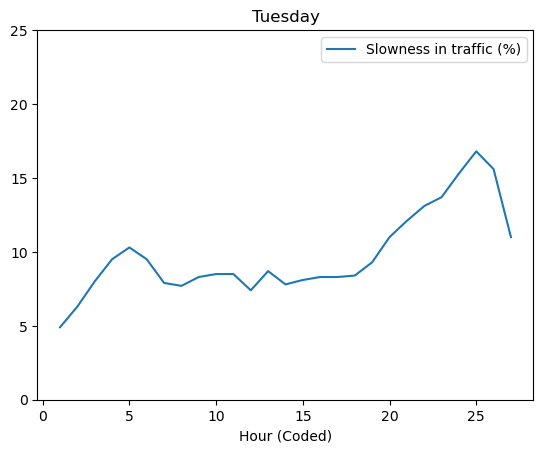

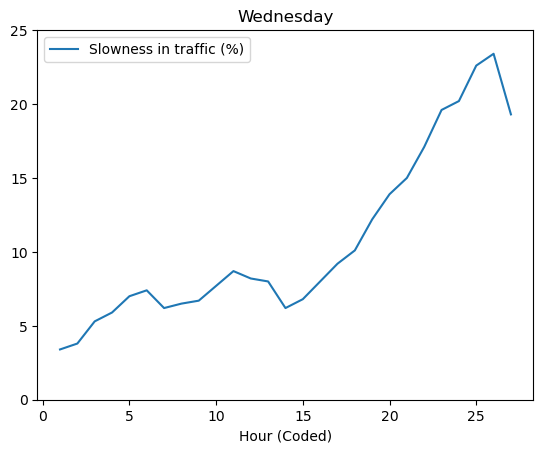

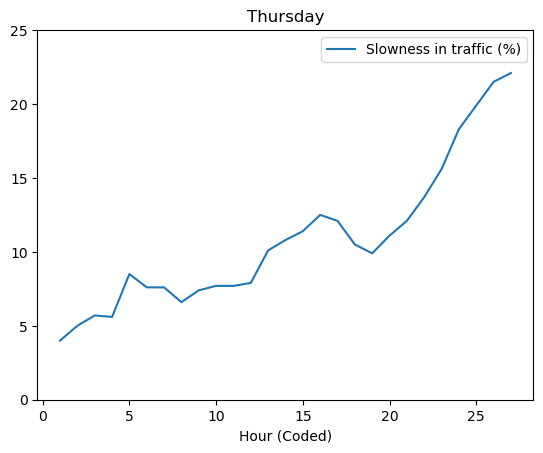

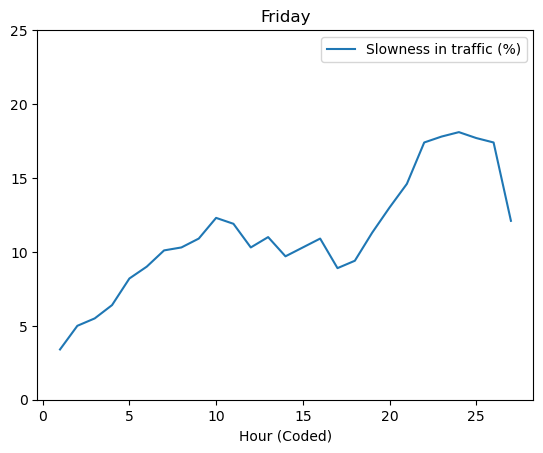

In [23]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
    
    

for day in days:
    traffic_per_day[day].plot.line(x="Hour (Coded)",y="Slowness in traffic (%)")
    plt.title(day)
    plt.ylim([0, 25])
    plt.show()

Comparing on a multiple line graph:

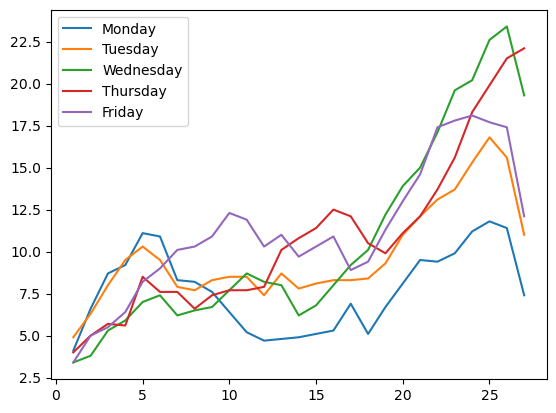

In [24]:
for day in days:
    plt.plot(traffic_per_day[day]["Hour (Coded)"], traffic_per_day[day]["Slowness in traffic (%)"], label=day)
    
plt.legend()
plt.show()

Using for loop to create a grid of plots:

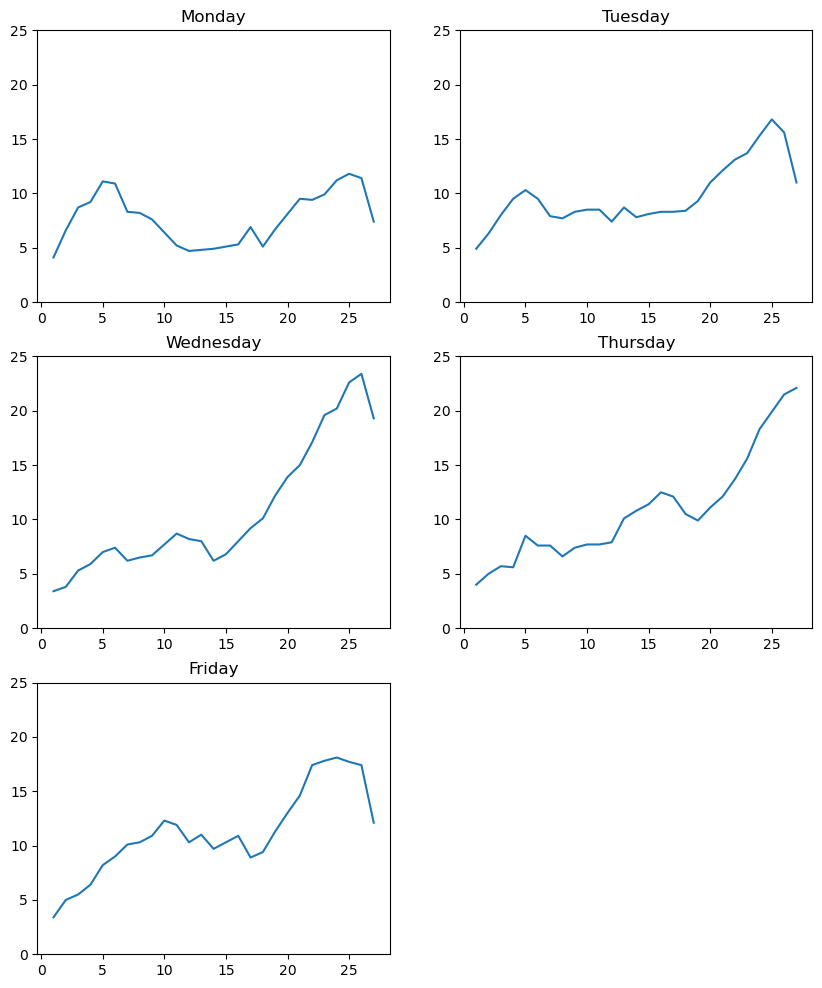

In [25]:
plt.figure(figsize=(10,12))

for i, day in zip(range(1, 6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]["Hour (Coded)"],traffic_per_day[day]["Slowness in traffic (%)"], label=day)
    plt.title(day)
    plt.ylim([0,25])
    
plt.show()

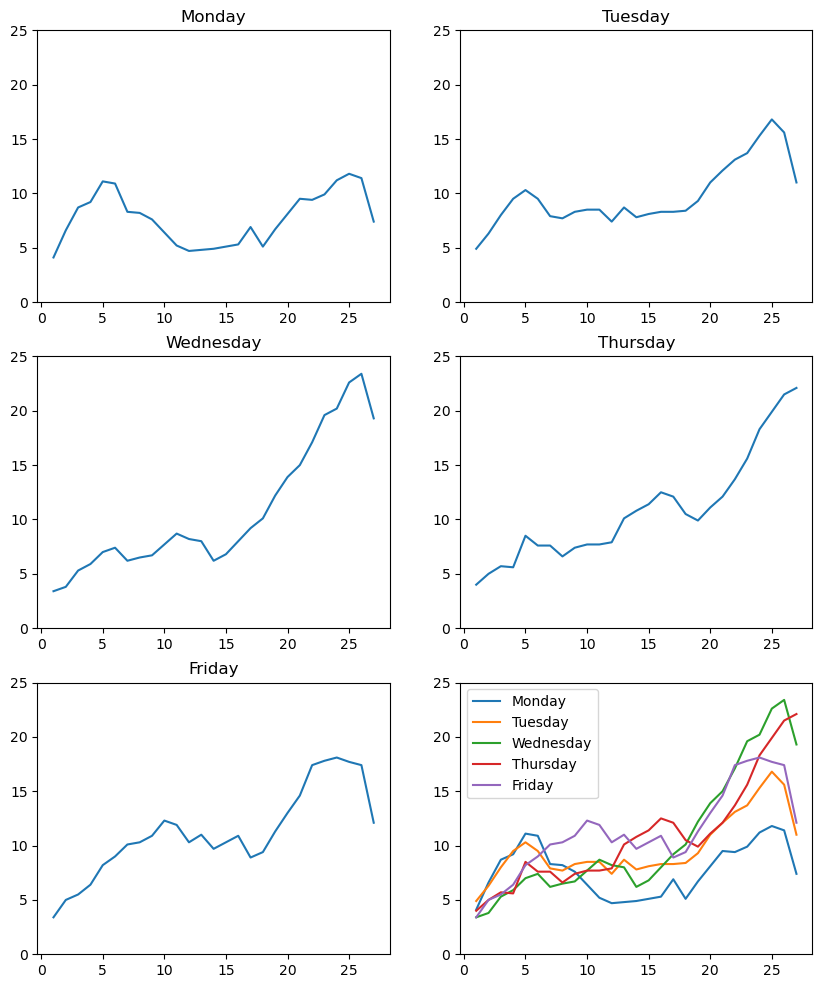

In [26]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
    
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])

plt.subplot(3,2,6)
for day in days:
    plt.plot(traffic_per_day[day]["Hour (Coded)"], traffic_per_day[day]["Slowness in traffic (%)"], label=day)
plt.ylim([0,25])    
plt.legend()
plt.show()

## Relational Plots and Multiple Variables

Inspecting the dataframe:

In [27]:
import pandas as pd
housing = pd.read_csv("housing.csv")

print(housing.head(5))

print(housing.tail(5))
print(housing.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ...  Fence Misc Feature Misc Val Mo Sold  \
0   NaN       IR1          Lvl  ...    NaN          NaN        0       5   
1   NaN       Reg          Lvl  ...  MnPrv          NaN        0       6   
2   NaN       IR1          Lvl  ...    NaN         Gar2    12500       6   
3   NaN       Reg          Lvl  ...    NaN          NaN        0       4   
4   NaN       IR1          Lvl  ...  MnPrv          NaN        0       3   

  Yr Sold Sale Type Sale Condition SalePrice           Year            Rooms  
0

Generating plots in two styles:

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


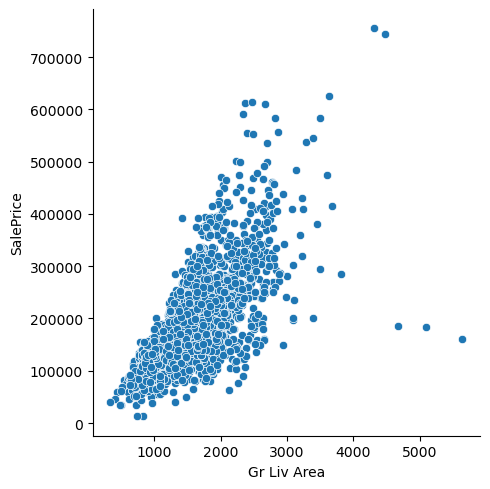

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


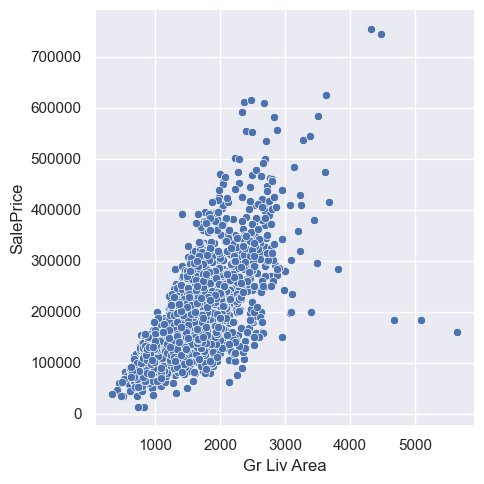

In [32]:
import pandas as pd
housing = pd.read_csv('housing.csv')

import seaborn as sns
import matplotlib.pyplot as plt

sns.reset_orig()
sns.relplot(data=housing, x="Gr Liv Area", y="SalePrice")
plt.show()

sns.set_theme()
sns.relplot(data=housing, x="Gr Liv Area", y="SalePrice")
plt.show()

Using hues and palettes:

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


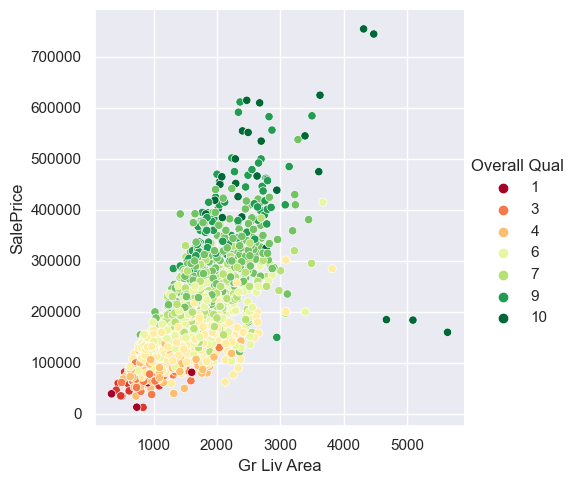

In [33]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue="Overall Qual", palette="RdYlGn")
plt.show()

Using size and sizes parameters:

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


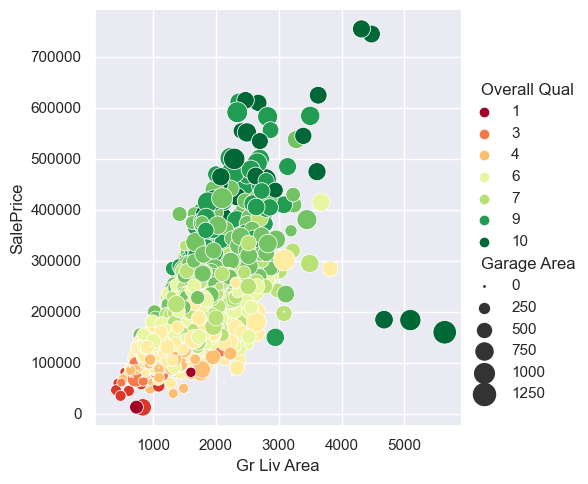

In [45]:
sns.set_theme()
sns.relplot(
    data=housing, 
    x='Gr Liv Area', 
    y='SalePrice', 
    hue='Overall Qual', 
    palette='RdYlGn', 
    size="Garage Area", 
    sizes=(1,300))
plt.show()

Using shapes:

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


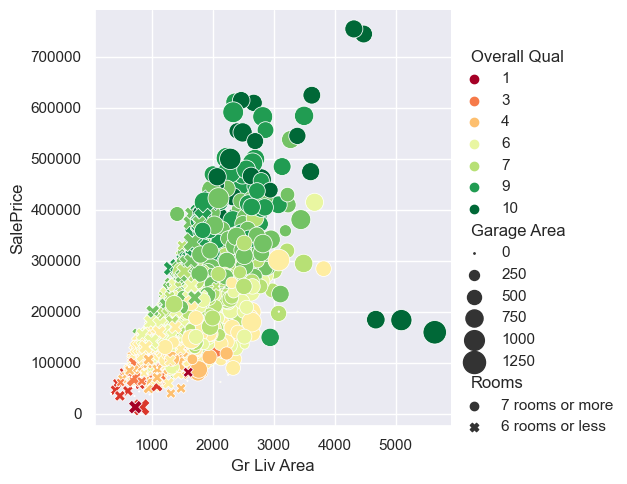

In [46]:
sns.set_theme()
sns.relplot(
    data=housing, 
    x='Gr Liv Area', 
    y='SalePrice', 
    hue='Overall Qual', 
    palette='RdYlGn', 
    size='Garage Area', 
    sizes=(1,300), 
    style="Rooms")
plt.show()

Using spatial separation based on value:

C:\Users\oxbbar\miniconda3\envs\courses\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


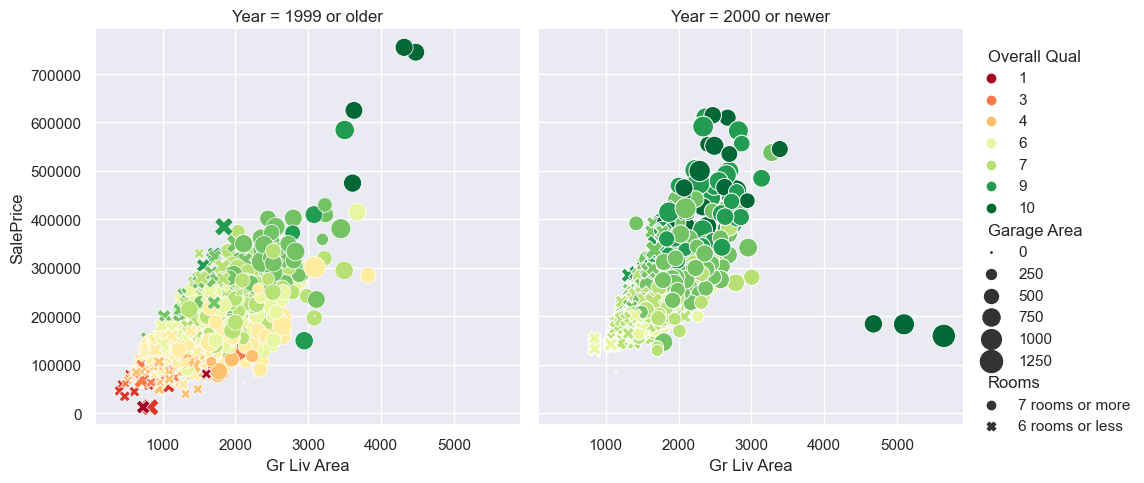

In [47]:
sns.set_theme()
sns.relplot(
    data=housing, 
    x='Gr Liv Area', 
    y='SalePrice', 
    hue='Overall Qual', 
    palette='RdYlGn', 
    size='Garage Area', 
    sizes=(1,300), 
    style='Rooms', 
    col = 'Year')
plt.show()

## Guided Project: Finding Heavy Traffic Indicators on I-94

Please see separate project notebook.